<a href="https://colab.research.google.com/github/andriiimaulanaa/data-mining/blob/main/TM_DATA_MINING_ANDRI_MAULANA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import VarianceThreshold

# Algoritma
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Evaluasi
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [ ]:
#load dataset
df = pd.read_csv(
    "Most Streamed Spotify Songs 2024.csv",
    encoding="latin1"
)

print(df.shape)
df.head()


(4600, 29)


,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [ ]:
#eksplorasi data
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

,Track Score,Spotify Popularity,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,TIDAL Popularity,Explicit Track
count,4600.000000,3796.000000,4039.00000,3679.000000,3545.000000,0.0,4600.000000
mean,41.844043,63.501581,54.60312,32.310954,25.348942,NaN,0.358913
std,38.543766,16.186438,71.61227,54.274538,25.989826,NaN,0.479734
min,19.400000,1.000000,1.00000,1.000000,1.000000,NaN,0.000000
25%,23.300000,61.000000,10.00000,5.000000,8.000000,NaN,0.000000
50%,29.900000,67.000000,28.00000,15.000000,17.000000,NaN,0.000000
75%,44.425000,73.000000,70.00000,37.000000,34.000000,NaN,1.000000
max,725.400000,96.000000,859.00000,632.000000,210.000000,NaN,1.000000


In [ ]:
#data cleaning
df = df.drop_duplicates()

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.median(numeric_only=True), inplace=True)


In [ ]:
# Pastikan kolom stream benar
stream_col = [col for col in df.columns if 'stream' in col.lower()][0]
print("Kolom target:", stream_col)

# Hapus koma dan ubah ke numerik
df[stream_col] = (
    df[stream_col]
    .astype(str)
    .str.replace(",", "", regex=True)
    .astype(float)
)



Kolom target: Spotify Streams


In [ ]:
threshold = df[stream_col].median()

df['popularity_label'] = df[stream_col].apply(
    lambda x: 1 if x >= threshold else 0
)

df['popularity_label'].value_counts()


,count
popularity_label,
0,2355
1,2243


In [ ]:
# Cari kolom streams
stream_col = [col for col in df.columns if 'stream' in col.lower()][0]
print("Kolom target:", stream_col)

# Buat label berdasarkan median
threshold = df[stream_col].median()

df['popularity_label'] = df[stream_col].apply(
    lambda x: 1 if x >= threshold else 0
)

df['popularity_label'].value_counts()


Kolom target: Spotify Streams


,count
popularity_label,
0,2355
1,2243


In [ ]:
le = LabelEncoder()

for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])


In [ ]:
X = df.drop([stream_col, 'popularity_label'], axis=1)
y = df['popularity_label']

vt = VarianceThreshold(threshold=0)
X = vt.fit_transform(X)


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_variance_threshold.py:114: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_variance_threshold.py:122: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42
)


In [ ]:
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(
        n_estimators=100,
        random_state=42
    ),
    "SVM": SVC(kernel='rbf')
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
        "Algoritma": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    })

hasil_df = pd.DataFrame(results)
hasil_df


,Algoritma,Accuracy,Precision,Recall,F1-Score
0,KNN,0.778261,0.754967,0.786207,0.770270
1,Random Forest,0.850000,0.842956,0.839080,0.841014
2,SVM,0.835870,0.839713,0.806897,0.822978


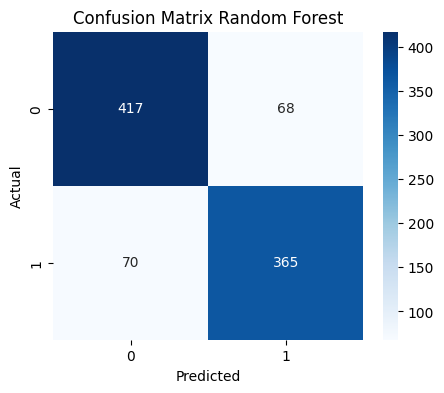

In [ ]:
rf_model = models["Random Forest"]
rf_pred = rf_model.predict(X_test)

cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Random Forest")
plt.show()


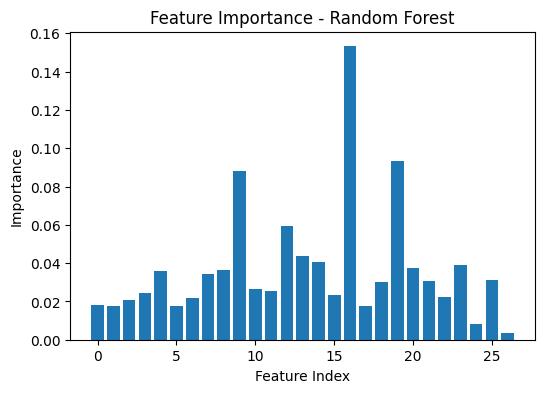

In [ ]:
importances = rf_model.feature_importances_

plt.figure(figsize=(6,4))
plt.bar(range(len(importances)), importances)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()


In [ ]:
corr_matrix = df.corr()


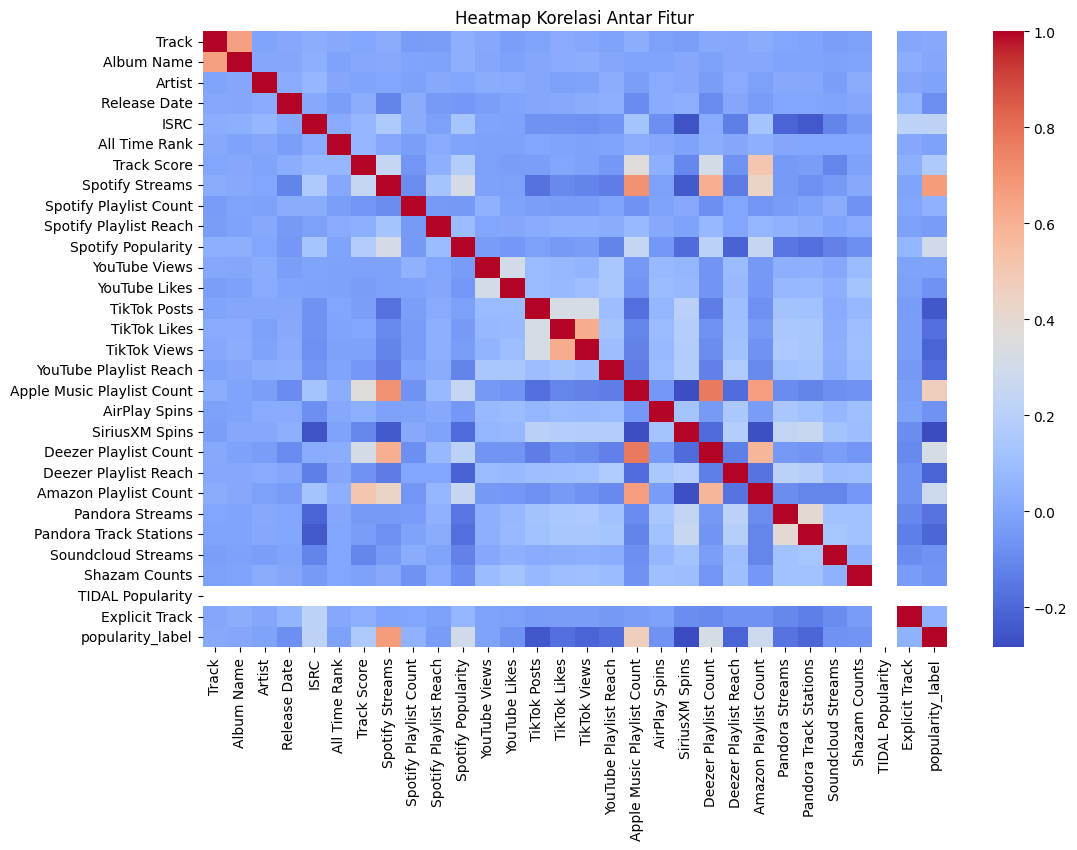

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    annot=False
)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()
